## Model Specification
The model we entertain has the form:

\begin{align}
Y = \mu+\tau_{1}I_{1} + \tau_{2}I_{2} + \epsilon,
\end{align}

where $I_{i}$, $\mathit i$ = 1, 2, 3, is the dummy variables.

## Loading Data

In [4]:
df = read.csv('./data/benign_prostate_hyperplasia.csv')
df

Increase.in.Urine.Flow,Treatment,I1,I2
1.1,drug,1,0
1.4,drug,1,0
1.3,drug,1,0
1.9,drug,1,0
1.6,drug,1,0
2.9,microwave,0,1
3.7,microwave,0,1
3.4,microwave,0,1
3.4,microwave,0,1
2.8,microwave,0,1


## The Estimators

In [55]:
cat('mu1_hat:', round(mean(df[df$Treatment == 'drug', 1]), digits=2), '\n')
cat('mu2_hat:', round(mean(df[df$Treatment == 'microwave', 1]), digits=2), '\n')
cat('mu3_hat:', round(mean(df[df$Treatment == 'surgery', 1]), digits=2), '\n')

mu1_hat: 1.46 
mu2_hat: 3.07 
mu3_hat: 4.72 


## Fitting the Data

In [5]:
model = lm(Increase.in.Urine.Flow~I1+I2, data=df)
model.summ = summary(model)
model.summ


Call:
lm(formula = Increase.in.Urine.Flow ~ I1 + I2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8667 -0.2167 -0.0250  0.3333  0.6333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.08389    0.12354  24.963 1.03e-11 ***
I1          -1.62389    0.17352  -9.358 7.30e-07 ***
I2          -0.01722    0.16624  -0.104    0.919    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4719 on 12 degrees of freedom
Multiple R-squared:  0.8989,	Adjusted R-squared:  0.8821 
F-statistic: 53.37 on 2 and 12 DF,  p-value: 1.065e-06


## Assessing the Fit

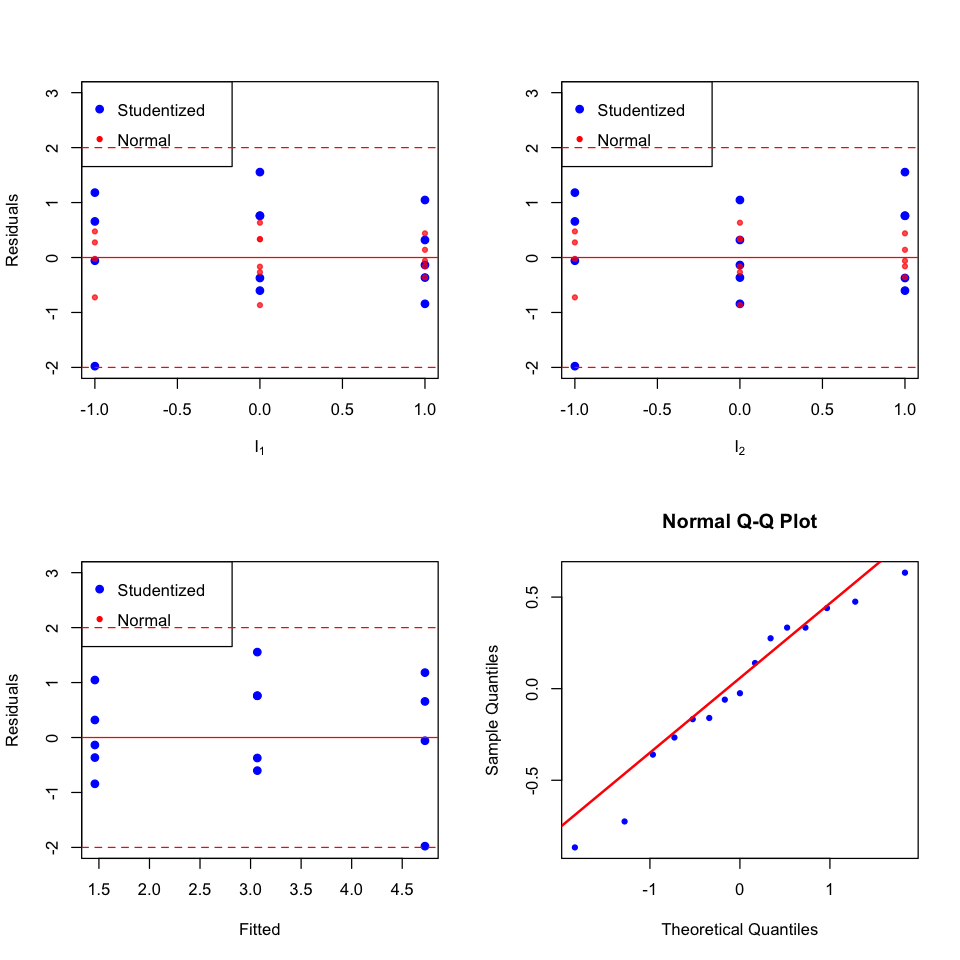

In [112]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2, 2))

# function to check outliers
plot_tres = function (x, y, xlab='', ylab='', lowlim=-2, uplim=2) {
    plot(x, y, col='blue', pch=19, xlab=xlab, ylab=ylab, ylim=c(-2, 3))
    points(df$I1, model.summ$residual, pch=20, col=rgb(1, 0, 0, .7))
    legend('topleft', legend=c('Studentized', 'Normal'), pch=c(19, 20), col=c('blue', 'red'), y.intersp=1.2)
    abline(h=0, col='red')
    abline(h=2, col='red', lty=2)
    abline(h=-2, col='red', lty=2)
}

tres = rstudent(model)

plot_tres(df$I1, tres, xlab=expression('I'[1]), ylab='Residuals')
plot_tres(df$I2, tres, xlab=expression('I'[2]))
plot_tres(fit(df$I1, df$I2), tres, xlab='Fitted', ylab='Residuals')

# qq-plot to assess normality
qqnorm(model.summ$residuals, pch=20, col='blue')
qqline(model.summ$residuals, col = "red", lwd = 2)


## The Estimation

In [9]:
fit = function (I1, I2) {
    return(model$coefficients[1] + model$coefficients[2]*I1 + model$coefficients[3]*I2)
}
mu1_hat = round(fit(1, 0), digits=2)
mu2_hat = round(fit(0, 1), digits=2)
mu3_hat = round(fit(-1, -1), digits=2)

cat('mu1_hat:', mu1_hat, '\n')
cat('mu2_hat:', mu2_hat, '\n')
cat('mu3_hat:', mu3_hat, '\n')

mu1_hat: 1.46 
mu2_hat: 3.07 
mu3_hat: 4.72 
